<a href="https://colab.research.google.com/github/andremarinho17/data_analytics_projects_en/blob/main/Activity_Build_an_XGBoost_model_Andr%C3%A9_Marinho.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity: Build an XGBoost model to predict customer satisfaction for an Airline company

<p align="center"><img src="https://cdn.shopify.com/s/files/1/0657/3100/2634/files/Papier_peint_avion_Decollage_en_style_pop_art_et_colore.jpg?v=1712910949" >


## Introduction

In this activity, you’ll build on the skills and techniques you learned in the decision tree and random forest lessons to construct your own XGBoost classification model. The XGBoost model is a very powerful extension of decision trees, so having a strong working familiarity with this process will strengthen your skills and resume as a data professional.

This activity is a continuation of the airlines project in which you built decision tree and random forest models. You will use the same data, but this time you will train, tune, and evaluate an XGBoost model. You’ll then compare the performance of all three models and decide which model is best. Finally, you’ll explore the feature importances of your model and identify the features that most contribute to customer satisfaction.


## Step 1: Imports

### Import packages

Begin with your import statements. First, import `pandas`, `numpy`, and `matplotlib` for data preparation. Next, import scikit-learn (`sklearn`) for model preparation and evaluation. Then, import `xgboost`, which provides the classification algorithm you'll implement to formulate your predictive model.

In [ ]:
# Import relevant libraries and modules.

import numpy as np
import pandas as pd
import matplotlib as plt
import pickle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

from xgboost import XGBClassifier
from xgboost import plot_importance

### Load the dataset

To formulate your model, `pandas` is used to import a csv of airline passenger satisfaction data called `Invistico_Airline.csv`. This DataFrame is called `airline_data`. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [ ]:
# RUN THIS CELL TO IMPORT YOUR DATA.

### YOUR CODE HERE ###

df = pd.read_csv('/content/Invistico_Airline (1).csv')

### Display the data

Examine the first 10 rows of data to familiarize yourself with the dataset.

In [ ]:
# Display the first ten rows of data.

df.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


### Display the data type for each column

Next, observe the types of data present within this dataset.

In [ ]:
# Display the data type for each column in your DataFrame.

df.dtypes

,0
satisfaction,object
Customer Type,object
Age,int64
Type of Travel,object
Class,object
Flight Distance,int64
Seat comfort,int64
Departure/Arrival time convenient,int64
Food and drink,int64
Gate location,int64


**Question:** Identify the target (or predicted) variable for passenger satisfaction. What is your initial hypothesis about which variables will be valuable in predicting satisfaction?

The target variable is `satisfaction`. As seen in the previous algorithms (decision tree and random forest), variables such as `Ease of Online booking`, `Inflight entertainment`, and `Seat Comfort` can potentialize satisfaction prediction.

## Step 2: Model preparation

Before you proceed with modeling, consider which metrics you will ultimately want to leverage to evaluate your model.

**Question:** Which metrics are most suited to evaluating this type of model?

The common metrics, such as accuracy, precision, recall, and the F1 score are suitable to evaluate this type of model, as well as the ROC AUC.

### Prepare your data for predictions

You may have noticed when previewing your data that there are several non-numerical variables (`object` data types) within the dataset.

To prepare this DataFrame for modeling, first convert these variables into a numerical format.

In [ ]:
# Convert the object predictor variables to numerical dummies.

df_copy = pd.get_dummies(df, columns = ['satisfaction', 'Customer Type', 'Type of Travel', 'Class'])
df_copy.head()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,...,Arrival Delay in Minutes,satisfaction_dissatisfied,satisfaction_satisfied,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,65,265,0,0,0,2,2,4,2,3,...,0.0,False,True,True,False,False,True,False,True,False
1,47,2464,0,0,0,3,0,2,2,3,...,305.0,False,True,True,False,False,True,True,False,False
2,15,2138,0,0,0,3,2,0,2,2,...,0.0,False,True,True,False,False,True,False,True,False
3,60,623,0,0,0,3,3,4,3,1,...,0.0,False,True,True,False,False,True,False,True,False
4,70,354,0,0,0,3,4,3,4,2,...,0.0,False,True,True,False,False,True,False,True,False


### Isolate your target and predictor variables
Separately define the target variable (`satisfaction`) and the features.

In [ ]:
# Define the y (target) variable.

y = df_copy['satisfaction_satisfied']

# Define the X (predictor) variables.

X = df_copy.drop(['satisfaction_dissatisfied', 'satisfaction_satisfied'], axis = 1)

### Divide your data

Divide your data into a training set (75% of the data) and test set (25% of the data). This is an important step in the process, as it allows you to reserve a part of the data that the model has not used to test how well the model generalizes (or performs) on new data.

In [ ]:
# Perform the split operation on your data.
# Assign the outputs as follows: X_train, X_test, y_train, y_test.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

## Step 3: Model building

### "Instantiate" your XGBClassifer

Before you fit your model to your airline dataset, first create the XGB Classifier model and define its objective. You'll use this model to fit and score different hyperparameters during the GridSearch cross-validation process.

In [ ]:
# Define xgb to be your XGBClassifier.

xgb = XGBClassifier(objective='binary:logistic', random_state=0)

### Define the parameters for hyperparameter tuning

To identify suitable parameters for your `xgboost` model, first define the parameters for hyperparameter tuning. Specifically, consider tuning `max_depth`, `min_child_weight`, `learning_rate`, `n_estimators`, `subsample`, and/or `colsample_bytree`.

Consider a more limited range for each hyperparameter to allow for timely iteration and model training. For example, using a single possible value for each of the six hyperparameters listed above will take approximately one minute to run on this platform.

```
{
    'max_depth': [4],
    'min_child_weight': [3],
    'learning_rate': [0.1],
    'n_estimators': [5],
    'subsample': [0.7],
    'colsample_bytree': [0.7]
}
```

If you add just one new option, for example by changing `max_depth: [4]` to `max_depth: [3, 6]`, and keep everything else the same, you can expect the run time to approximately double. If you use two possibilities for each hyperparameter, the run time would extend to ~1 hour.
         

In [ ]:
# Define parameters for tuning as `cv_params`.

cv_params = {
    'max_depth': [4, 5],
    'min_child_weight': [3, 5],
    'learning_rate': [0.1, 0.2],
    'n_estimators': [5, 10],
    'subsample': [0.7],
    'colsample_bytree': [0.7]
}

**Question:** What is the likely effect of adding more estimators to your GridSearch?

On the one hand, it could increase the model's performance. On another hand, it could also increase the time to process significantly.

### Define how the models will be evaluated

Define how the models will be evaluated for hyperparameter tuning. To yield the best understanding of model performance, utilize a suite of metrics.

In [ ]:
# Define your criteria as `scoring`.

scoring = ['accuracy', 'recall', 'precision', 'f1']

### Construct the GridSearch cross-validation

Construct the GridSearch cross-validation using the model, parameters, and scoring metrics you defined. Additionally, define the number of folds and specify *which metric* from above will guide the refit strategy.

In [ ]:
# Construct your GridSearch.

xgb_cv = GridSearchCV(xgb, cv_params, scoring = scoring, cv=5, refit='f1')

### Fit the GridSearch model to your training data

If your GridSearch takes too long, revisit the parameter ranges above and consider narrowing the range and reducing the number of estimators.

**Note:** The following cell might take several minutes to run.

In [ ]:
%%time
# fit the GridSearch model to training data

xgb_cv.fit(X_train, y_train)

CPU times: user 59.2 s, sys: 204 ms, total: 59.4 s
Wall time: 39.4 s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'colsample_bytree': [0.7], 'learning_rate': [0.1, 0.2],
                         'max_depth': [4, 5], 'min_child_weight': [3, 5],
                         'n_estimators': [5, 10], 'subsample': [0.7]},
             refit='f1', scoring=['accuracy', 'recall', 'precision', 'f1'])

**Question:** Which optimal set of parameters did the GridSearch yield?

The optimal set of paramaters are:

In [ ]:
xgb_cv.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.2,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 10,
 'subsample': 0.7}

### Save your model for reference using `pickle`

Use the `pickle` library you've already imported to save the output of this model.

In [ ]:
# Use `pickle` to save the trained model.

pickle.dump(xgb_cv, open('xgb_cv.sav', 'wb'))

## Step 4: Results and evaluation

### Formulate predictions on your test set

To evaluate the predictions yielded from your model, leverage a series of metrics and evaluation techniques from scikit-learn by examining the actual observed values in the test set relative to your model's prediction.

First, use your trained model to formulate predictions on your test set.

In [ ]:
# Apply your model to predict on your test data. Call this output "y_pred".

y_pred = xgb_cv.predict(X_test)

### Leverage metrics to evaluate your model's performance

Apply a series of metrics from scikit-learn to assess your model. Specifically, print the accuracy score, precision score, recall score, and f1 score associated with your test data and predicted values.

In [ ]:
f1 =  metrics.f1_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
precision =  metrics.precision_score(y_test, y_pred)
accuracy = metrics.accuracy_score(y_test, y_pred)

In [ ]:
print('F1 score final XGB model: ', f1)
print('Recall score final XGB model: ', recall)
print('Precision score final XGB model: ', precision)
print('Accuracy score final XGB model: ', accuracy)

F1 score final XGB model:  0.9176301377440947
Recall score final XGB model:  0.9292997198879552
Precision score final XGB model:  0.90625
Accuracy score final XGB model:  0.9082845703726516


**Question:** How should you interpret your accuracy score?

The accuracy of the model is about 90.82%, which means that 90.82% of the survey responses were predicted accurately.

**Question:** Is your accuracy score alone sufficient to evaluate your model?

The accuracy by itself doesn't tell that much. It's also important to evaluate other metrics such as precision, recall, and F1 score, in order to get a more detailed view of the predictive power of the model.

**Question:** When observing the precision and recall scores of your model, how do you interpret these values, and is one more accurate than the other?

The model presents a precision of 90.62, showing a good capability of prediciting satisfied customers. When it comes to recall, the value is 92.92, which means that the model also presented a good result in predicting dissatisfied customers.



**Question:** What does your model's F1 score tell you, beyond what the other metrics provide?*

The F1-score is the harmonic mean of the precision and recall. The result of the F1-score for this model is 91.76, showing the good predictive power of this model overall.

### ROC AUC

The ROC curve shows how well a model separates classes by plotting true positive rate vs. false positive rate at different thresholds. It’s useful for understanding a model’s trade-off between sensitivity and false alarms. The area under the curve (AUC) summarizes this, with higher values meaning better performance.

In [ ]:
from sklearn.metrics import roc_curve, auc

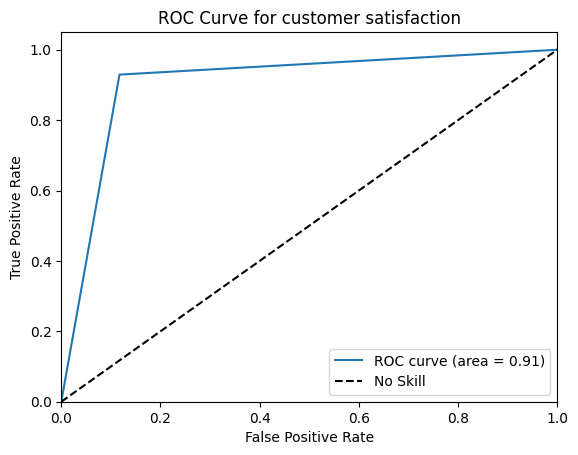

In [ ]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for customer satisfaction')
plt.legend()
plt.show()

As it can be seen, the model's TP/FP rate is reasonably close to the top-left corner of the plot, which suggests reasonable predictive power of the model at classifying whether a customer of the airline company will be satisfied or not with their services.

### Gain clarity with the confusion matrix

Recall that a **confusion matrix** is a graphic that shows a model's true and false positives and true and false negatives. It helps to create a visual representation of the components feeding into the metrics above.

Create a confusion matrix based on your predicted values for the test set.

In [ ]:
import matplotlib.pyplot as plt

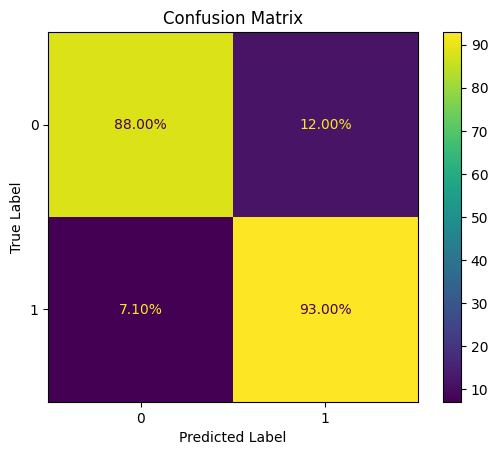

In [ ]:
def conf_matrix_plot_percentage(model, x_data, y_data):
    '''
    Accepts a model object, X data (test or validate), and y data (test or validate).
    Returns a plot of the confusion matrix with percentages for predictions on y data, including the % symbol.
    '''
    # Predict the labels
    model_pred = model.predict(x_data)

    # Compute the confusion matrix
    cm = metrics.confusion_matrix(y_data, model_pred, labels=model.classes_)

    # Normalize the confusion matrix by row (to show percentages per class)
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

    # Create a confusion matrix display
    disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm_percentage,
                                  display_labels=model.classes_)

    # Plot the confusion matrix
    disp.plot()

    # Customize text to add the '%' symbol
    for i, text in enumerate(disp.text_.ravel()):
        value = float(text.get_text())
        text.set_text(f"{value:.2f}%")  # Format with percentage symbol

    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()


# Create the display for your confusion matrix.

conf_matrix_plot_percentage(xgb_cv, X_test, y_test)


# Plot the visual in-line.

plt.show()

**Question:** When observing your confusion matrix, what do you notice? Does this correlate to any of your other calculations?

The model demonstrates strong accuracy in predicting both satisfied and dissatisfied customers (top left and bottom right), which reflects a good accuracy of 90.8%. The high proportion of true negatives relative to false positives contributes to the model's precision of 90.6%, indicating that when the model predicts dissatisfaction, it is correct most of the time. Additionally, the recall score of 92.9% highlights the model's effectiveness in correctly identifying satisfied customers, which aligns with the 93% true positive rate observed in the confusion matrix. The F1 score of 91.7% confirms a strong balance between precision and recall, showcasing the model’s robustness.

### Visualize most important features

`xgboost` has a built-in function to visualize the relative importance of the features in the model using `matplotlib`. Output and examine the feature importance of your model.

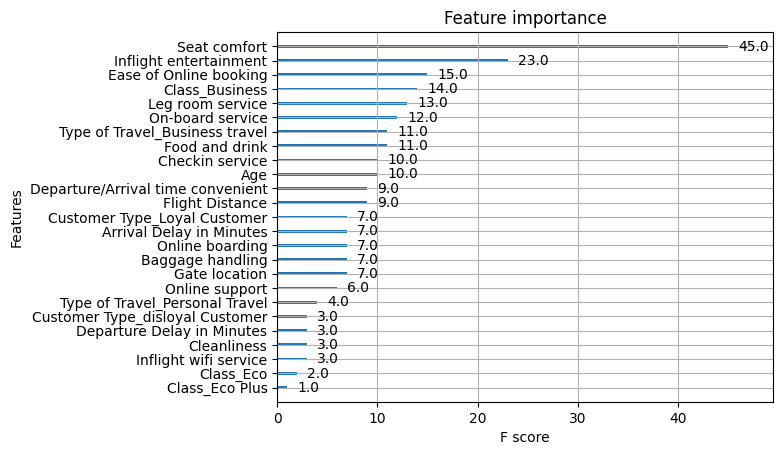

In [ ]:
# Plot the relative feature importance of the predictor variables in your model.

plot_importance(xgb_cv.best_estimator_);

**Question:** Examine the feature importances outputted above. What is your assessment of the result? Did anything surprise you?

Similar to the decision tree result, `Seat comfort`, `Inflight entertainment`, and `Ease of online booking` are the most important features, but the difference is that `Seat comfort` is the most important feature here, followed by  `Inflight entertainment` and `Ease of online booking`.

It is also notable that business-related features, such as `Class_Business` and `Type of Travel_Business Travel`, are important, reflecting that frequent travelers or premium-class passengers may have different satisfaction drivers compared to economy passengers. Interestingly, features like `Departure/Arrival time convenience` and `Flight Distance` have moderate importance, suggesting that timing and journey length influence satisfaction, though less so than comfort and entertainment.

What stands out as surprising is the relatively low importance of features like `Departure Delay` and `Arrival Delay`, which are often considered critical pain points in air travel. This may indicate that customers are more concerned with the quality of their experience during the flight rather than delays, as long as the overall in-flight service meets their expectations. Additionally, features such as `Class_Eco` and `Class_Eco Plus` have minimal importance, implying that customers in these categories may have more uniform experiences, or these features may not strongly distinguish satisfaction levels.


### Compare models

Create a table of results to compare model performance.

In [ ]:
# Create a table of results to compare model performance.

table = pd.DataFrame({'Model': ["Tuned Decision Tree", "Tuned Random Forest", "Tuned XGBoost"],
                      'F1': [0.943673, 0.946344	, f1],
                      'Recall': [0.935216, 0.943542, recall],
                      'Precision': [0.952305, 0.949163, precision],
                      'Accuracy': [0.938887, 0.941400, accuracy]
                     }
                    )
table

,Model,F1,Recall,Precision,Accuracy
0,Tuned Decision Tree,0.943673,0.935216,0.952305,0.938887
1,Tuned Random Forest,0.946344,0.943542,0.949163,0.941400
2,Tuned XGBoost,0.917630,0.929300,0.906250,0.908285


**Question:** How does this model compare to the decision tree and random forest models you built in previous labs?

Although the model shows strong predictive power, it has the weakest performance in all four metrics (F1, recall, precision, and accuracy) compared to the other models applied before (random forest and decision tree). Therefore, in this context, the tuned random forest may bring the best predictive results regarding whether a customer is satisfied with the airline company's services.

## Considerations

**How would you share your findings with your team?**

* The model demonstrates strong accuracy in predicting both satisfied and dissatisfied customers, with a good accuracy of 90.8%. The model has a precision of 90.6%, indicating that when the model predicts dissatisfaction, it is correct most of the time. Additionally, the recall score of 92.9% highlights the model's effectiveness in correctly identifying satisfied customers. The F1 score of 91.7% confirms a strong balance between precision and recall, showcasing the model’s robustness.

* The ROC AUC shows that the model's TP/FP rate is reasonably close to the top-left corner of the plot, which suggests reasonable predictive power of the model at classifying whether a customer of the airline company will be satisfied or not with their services.

* When it comes to feature importance:

    * **Top Features:** `Seat comfort`, `Inflight entertainment`, and `Ease of Online Booking` are the most important, with `Seat comfort` having the highest influence.
    * **Business Travel Influence:** Features like `Class_Business` and `Type of Travel_Business Travel` show higher importance, highlighting premium travelers' satisfaction drivers.
    * **Moderate Importance:** `Departure/Arrival time convenience` and `Flight Distance` moderately impact satisfaction.
    * **Surprising Insights:** `Departure Delay` and `Arrival Delay` have low importance, suggesting customers prioritize in-flight experience over punctuality.
    * **Low-Impact Features:** `Class_Eco` and `Class_Eco Plus` have minimal influence, indicating uniform experiences in economy classes.

* Although the model shows strong predictive power, it has the weakest performance in all four metrics (F1, recall, precision, and accuracy) compared to the other models applied before (random forest and decision tree). Therefore, in this context, the tuned random forest may bring the best predictive results regarding whether a customer is satisfied with the airline company's services.


**What would you share with and recommend to stakeholders?**

The model shows a good performance at predicting whether or not a customer is satisfied with the company's service. Therefore, given the results and the feature importance, it's recommended to conduct a more deeper study with a domain expert in order to:

* Prioritize enhancing seat comfort and inflight entertainment to directly address top satisfaction drivers.
* Improve business-class services and optimize offerings for business travelers, as they strongly impact satisfaction metrics.
* While delays have lower importance, ensuring exceptional in-flight services will further boost satisfaction.
* Maintain consistent quality in economy class while allocating resources where the model indicates higher returns.

Although the random forest presented the best result, the three models (decision tree, random forest, and XGBoost) demonstrated a strong performance in predicting customer satisfaction for the company and can be confidently used to inform business decisions and enhance strategies regarding customer satisfaction.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged